In [6]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
from matplotlib import pyplot as plt 

fname = 'C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\wz\\nano.root'
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
print("done")

done


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


454011
454011
454011
Nice!
[GenParticle, GenParticle, GenParticle, GenParticle]
[93.5, 88.2, 91.5, 90.8, 120, 91.2, 88.5, ... 91, 91.5, 90.2, 90.2, 89.5, 89, 95]


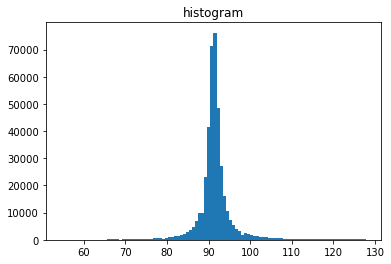

In [8]:
z =  events.GenPart[(np.abs(events.GenPart.pdgId) == 23) ]
print(len(events))
print(len(z))
z_from_q = ak.any(abs(z.distinctParent.pdgId) <= 6, axis = -1)
z_from_g = ak.any(abs(z.distinctParent.pdgId) == 21, axis = -1)
z_from_proton = z_from_q | z_from_g
print(len(z_from_proton))
print("Nice!")
z_from_proton = z[z_from_proton]
print(z_from_proton[0])
mass_z_from_proton = z_from_proton[:,0].mass
print(mass_z_from_proton)
plt.hist(mass_z_from_proton,bins=100) 
plt.title("histogram") 
plt.show()


In [43]:
z =  events.GenPart[(np.abs(events.GenPart.pdgId) == 23) ]
print(len(events))
print(len(z))
z_from_q = ak.any(abs(z.distinctParent.pdgId) <= 6, axis = -1)
z_from_g = ak.any(abs(z.distinctParent.pdgId) == 21, axis = -1)
z_from_proton = z_from_q | z_from_g
print(len(z_from_proton))
print("Nice!")
z_from_proton = z[z_from_proton]
print(z_from_proton)
z_from_proton = ak.flatten(z_from_proton)
z_from_proton = z_from_proton[(abs(z_from_proton.distinctChildren.pdgId) == 11)]
print(z_from_proton)



454011
454011
454011
Nice!
[[GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle, GenParticle]]


ValueError: too many jagged slice dimensions for array

(https://github.com/scikit-hep/awkward-1.0/blob/1.7.0/src/libawkward/array/NumpyArray.cpp#L3893)